In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
data = pd.read_csv("data/mtcars.csv")

data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [88]:
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
# Drop model mobil
data = data.drop(columns = ["model"])

data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Kita akan memprediksi mpg (miles/gallon) -- ukuran konsumsi bahan bakar

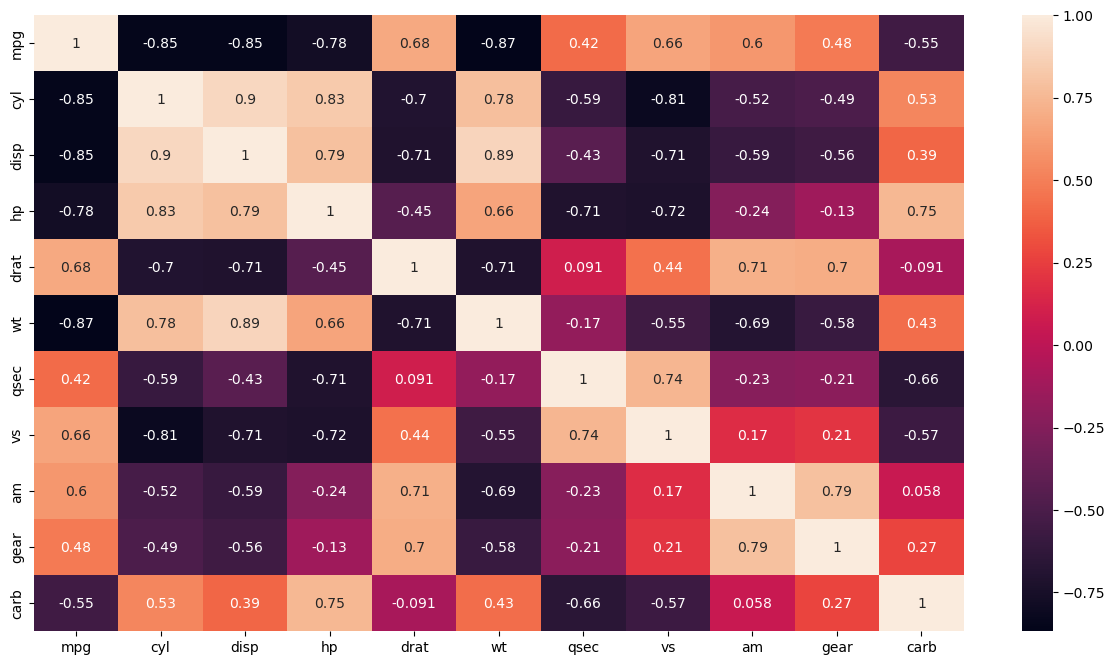

In [5]:
# Eksplorasi
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), 
            annot = True)

plt.show()

# Prepare Data

split input dan output

In [6]:
# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = data,
                          target_column = "mpg")

In [7]:
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

split train and test data

In [9]:
# 

from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [11]:
X_train.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,8,318.0,150,2.76,3.520,16.87,0,0,3,2
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4
18,4,75.7,52,4.93,1.615,18.52,1,1,4,2
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
y_train.head()

21    15.5
11    16.4
23    13.3
18    30.4
4     18.7
Name: mpg, dtype: float64

---
# **Melakukan Linear Regression**

**Tentukan baseline model**

- Baseline model regresi adalah rata-rata dari target

In [13]:
baseline_pred = np.mean(y_train)
print(baseline_pred)

19.299999999999997


In [14]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_train, 
                                  np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

37.193599999999996


Buat Objek Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Buat objek
lr = LinearRegression()

In [17]:
# Lakukan cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = lr,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

cv_score = -np.mean(scores)
cv_score

23.421110339589347

In [18]:
# Lakukan fitting
lr.fit(X = X_train,
       y = y_train)

LinearRegression()

In [19]:
# Cek test scores
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)

test_score = mean_squared_error(y_pred, y_test)
test_score

16.511353509876358

In [20]:
# Ekstrak model parameter
coef_ = lr.coef_
intercept_ = lr.intercept_
lr_params = np.append(coef_, intercept_)

lr_params_df = pd.DataFrame(lr_params,
                            index = list(X_train.columns) + ["constant"],
                            columns = ["coefficient"])
lr_params_df

,coefficient
cyl,1.097167
disp,0.006168
hp,-0.005287
drat,1.820345
wt,-3.668249
qsec,2.139810
vs,0.851392
am,5.880618
gear,-1.092819
carb,0.032545


In [21]:
def fit_model(X_train, y_train,
              X_test, y_test):
    # 1. Buat objek
    lr = LinearRegression()

    # 2. Lakukan cross-val
    scores = cross_val_score(estimator = lr,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    
    cv_score = - np.mean(scores)
    
    # 3. Fit model
    lr.fit(X = X_train,
           y = y_train)
    
    # 4. Cari train score
    y_train_pred = lr.predict(X_train)
    train_score = mean_squared_error(y_train, y_train_pred)
    
    # 4. Cari test score
    y_test_pred = lr.predict(X_test)
    test_score = mean_squared_error(y_test, y_test_pred)

    # 5. Ekstrak coefficient
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    lr_params = np.append(coef_, intercept_)

    lr_params_df = pd.DataFrame(lr_params,
                                index = list(X_train.columns) + ["constant"],
                                columns = ["coefficient"])
    
    return lr, train_score, cv_score, test_score, lr_params_df


In [22]:
lr, train_score, cv_score, test_score, lr_params_df = fit_model(X_train = X_train,
                                                                y_train = y_train,
                                                                X_test = X_test,
                                                                y_test = y_test)
print(f"train score: {train_score:.3f}, cv score: {cv_score:.3f}, test_score: {test_score:.3f}")

train score: 3.886, cv score: 23.421, test_score: 16.511


---
# **Melakukan Best Selection**

Buat kombinasi semua yang mungkin

In [23]:
from itertools import combinations

In [24]:
column_list = list(X_train.columns)
n_column = len(column_list)

column_list

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [25]:
train_column_list = []

for i in range(n_column):
    list_of_combination = combinations(column_list, i)
    for combi in list_of_combination:
        train_column_list.append(list(combi))

# tambahkan seluruh kolom
train_column_list.append(column_list)

In [26]:
len(train_column_list)

1024

Coba kita ambil salah satu kombinasi model

In [27]:
idx = 95
train_list_idx = train_column_list[idx]
train_list_idx

['disp', 'hp', 'vs']

In [28]:
# Filter Data
X_train_idx = X_train[train_list_idx]
X_train_idx.head()

,disp,hp,vs
21,318.0,150,0
11,275.8,180,0
23,350.0,245,0
18,75.7,52,1
4,360.0,175,0


In [29]:
X_test_idx = X_test[train_list_idx]
X_test_idx.head()

,disp,hp,vs
7,146.7,62,1
31,121.0,109,1
5,225.0,105,1
26,120.3,91,0
8,140.8,95,1


In [30]:
# Lakukan modeling
_, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                              y_train = y_train,
                                              X_test = X_test_idx,
                                              y_test = y_test)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}, test_score: {test_idx:.3f}")

train score: 8.990, cv score: 13.996, test_score: 9.239


Ambil kombinasi lain

In [31]:
idx = 520
train_list_idx = train_column_list[idx]
train_list_idx

['disp', 'hp', 'drat', 'qsec', 'carb']

In [32]:
# Filter Data
X_train_idx = X_train[train_list_idx]
X_train_idx.head()

,disp,hp,drat,qsec,carb
21,318.0,150,2.76,16.87,2
11,275.8,180,3.07,17.40,3
23,350.0,245,3.73,15.41,4
18,75.7,52,4.93,18.52,2
4,360.0,175,3.15,17.02,2


In [33]:
X_test_idx = X_test[train_list_idx]
X_test_idx.head()

,disp,hp,drat,qsec,carb
7,146.7,62,3.69,20.00,2
31,121.0,109,4.11,18.60,2
5,225.0,105,2.76,20.22,1
26,120.3,91,4.43,16.70,2
8,140.8,95,3.92,22.90,2


In [34]:
# Lakukan modeling
_, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                              y_train = y_train,
                                              X_test = X_test_idx,
                                              y_test = y_test)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}, test_score: {test_idx:.3f}")

train score: 6.454, cv score: 18.045, test_score: 8.326


Cari semua cv score & test score

In [35]:
train_score = []
cv_score = []
test_score = []

for idx in range(len(train_column_list)):
    if idx != 0:
        # Filter data
        train_list_idx = train_column_list[idx]
        X_train_idx = X_train[train_list_idx]
        X_test_idx = X_test[train_list_idx]

        # Buat model
        _, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                                      y_train = y_train,
                                                      X_test = X_test_idx,
                                                      y_test = y_test)

        # Simpan hasil
        train_score.append(train_idx)
        cv_score.append(cv_idx)
        test_score.append(test_idx)

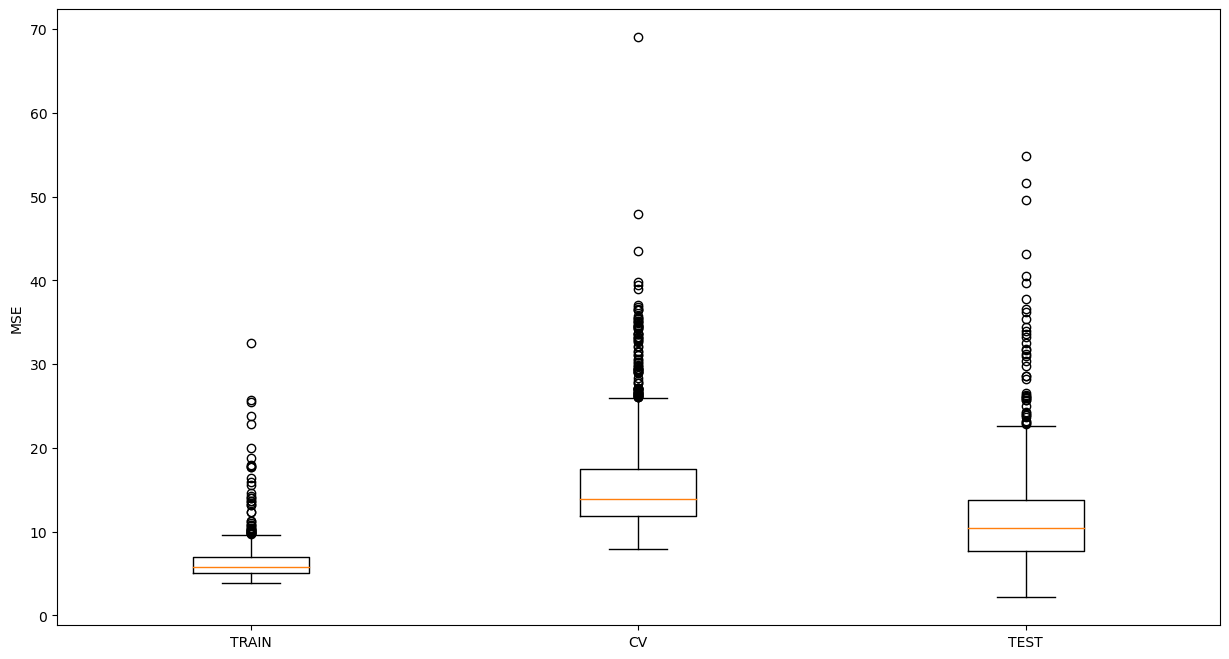

In [36]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ax.boxplot([train_score, cv_score, test_score])

ax.set_xticklabels(["TRAIN", "CV", "TEST"])
ax.set_ylabel("MSE")
plt.show()

In [37]:
# Cari best test
best_idx = np.argmin(test_score)
best_idx

268

In [38]:
# Best features
train_column_list[best_idx + 1]

['disp', 'hp', 'wt', 'gear']

In [39]:
# Find model
lr_best, train_best_score, cv_best_score, \
        test_best_score, lr_params_best = fit_model(X_train = X_train[train_column_list[best_idx+1]],
                                                    y_train = y_train,
                                                    X_test = X_test[train_column_list[best_idx+1]],
                                                    y_test = y_test)

In [40]:
lr_params_best

,coefficient
disp,0.004678
hp,-0.043084
wt,-3.291228
gear,1.178529
constant,31.599957


---
# **Melakukan Regularisasi Ridge**

In [41]:
# Import Ridge
from sklearn.linear_model import Ridge

In [42]:
# Buat objek
ridge = Ridge(alpha = 1.0)
# alpha adalah shrinkage parameter

In [43]:
# Lakukan fitting
ridge.fit(X = X_train,
          y = y_train)

Ridge()

In [44]:
# Buat prediksi di data train
y_pred_train = ridge.predict(X_train)
train_score = mean_squared_error(y_train, y_pred_train)
train_score

4.351995705520227

In [45]:
# Lakukan cross validation
scores = cross_val_score(estimator = ridge,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

scores

array([ -2.19724228, -13.7246591 ,  -2.94363723, -21.7404056 ,
       -19.51216624])

In [46]:
cv_score = -np.mean(scores)
cv_score

12.023622089361936

In [47]:
# Test score
y_pred_test = ridge.predict(X_test)
test_score = mean_squared_error(y_test, y_pred_test)
test_score

8.404794419034225

In [48]:
# Tampilkan parameter
coef_ = ridge.coef_
intercept_ = ridge.intercept_
params = np.append(coef_, intercept_)

params_df = pd.DataFrame(params,
                         index = list(X_train.columns) + ["constant"],
                         columns = ["coefficient"])
params_df

,coefficient
cyl,-0.118668
disp,-0.000219
hp,-0.005684
drat,1.381862
wt,-2.250519
qsec,1.163854
vs,-0.327942
am,2.575431
gear,0.545309
carb,-0.583326


In [49]:
# Gabungkan semuanya dalam 1 fungsi
def ridge_model(X_train, y_train,
                X_test, y_test,
                alpha):
    # Buat objek
    estimator = Ridge(alpha = alpha)

    # Lakukan fitting
    estimator.fit(X = X_train,
                  y = y_train)
    
    # Buat prediksi di data train
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_train, y_pred_train)

    # Lakukan cross validation
    scores = cross_val_score(estimator = estimator,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    cv_score = -np.mean(scores)

    # Test score
    y_pred_test = estimator.predict(X_test)
    test_score = mean_squared_error(y_test, y_pred_test)

    # Tampilkan parameter
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    params = np.append(coef_, intercept_)

    params_df = pd.DataFrame(params,
                             index = list(X_train.columns) + ["constant"],
                             columns = ["coefficient"])

    mse_score = [train_score, cv_score, test_score]

    return estimator, mse_score, params_df

In [50]:
alpha = 1.0
_, mse_score, ridge_param_1 = ridge_model(X_train = X_train,
                                          y_train = y_train,
                                          X_test = X_test,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
ridge_param_1

Train: 4.35, CV: 12.02, Test: 8.40


,coefficient
cyl,-0.118668
disp,-0.000219
hp,-0.005684
drat,1.381862
wt,-2.250519
qsec,1.163854
vs,-0.327942
am,2.575431
gear,0.545309
carb,-0.583326


In [51]:
alpha = 10.5
_, mse_score, ridge_param_2 = ridge_model(X_train = X_train,
                                          y_train = y_train,
                                          X_test = X_test,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
ridge_param_2

Train: 5.95, CV: 11.96, Test: 6.27


,coefficient
cyl,-0.538565
disp,-0.015011
hp,-0.011695
drat,0.519241
wt,-0.732290
qsec,0.136589
vs,0.053231
am,0.745650
gear,0.447634
carb,-0.680773


In [52]:
alphas = [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 
          12.5, 15.0, 17.5, 30.0, 50.0]

mse_list = []
model_list = []

for alpha in alphas:
    _, mse_i, model_i = ridge_model(X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test = y_test,
                                    alpha = alpha)
    
    mse_list.append(mse_i)
    model_list.append(model_i)

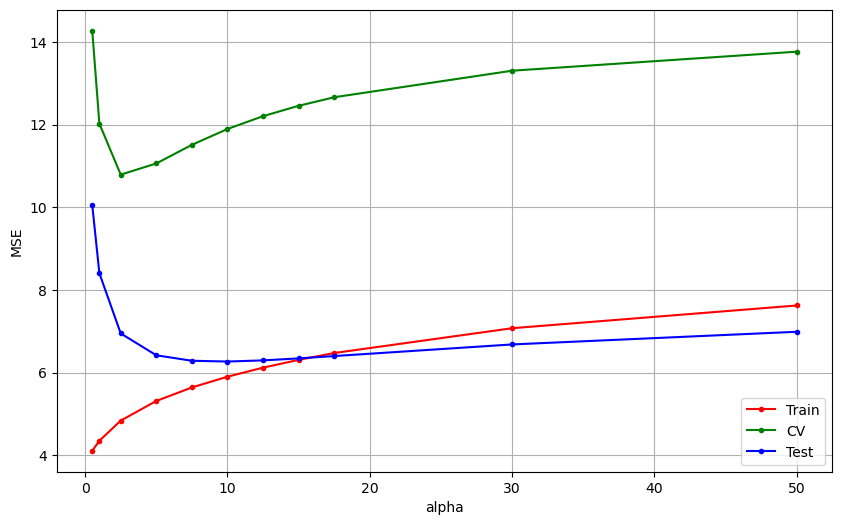

In [53]:
# Plot error
mse_list = np.array(mse_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_list[:, 0], c="r", marker=".", label="Train")
ax.plot(alphas, mse_list[:, 1], c="g", marker=".", label="CV")
ax.plot(alphas, mse_list[:, 2], c="b", marker=".", label="Test")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

# semakin besar alpha, semakin besar penalty term yang diberikan

In [54]:
# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_list[:, 1])
best_alpha = alphas[best_idx]
best_alpha

2.5

In [55]:
# Best model
best_param_ridge = model_list[best_idx]
best_param_ridge

,coefficient
cyl,-0.453721
disp,-0.005147
hp,-0.007531
drat,1.025724
wt,-1.539528
qsec,0.624478
vs,-0.126656
am,1.701397
gear,0.680265
carb,-0.731590


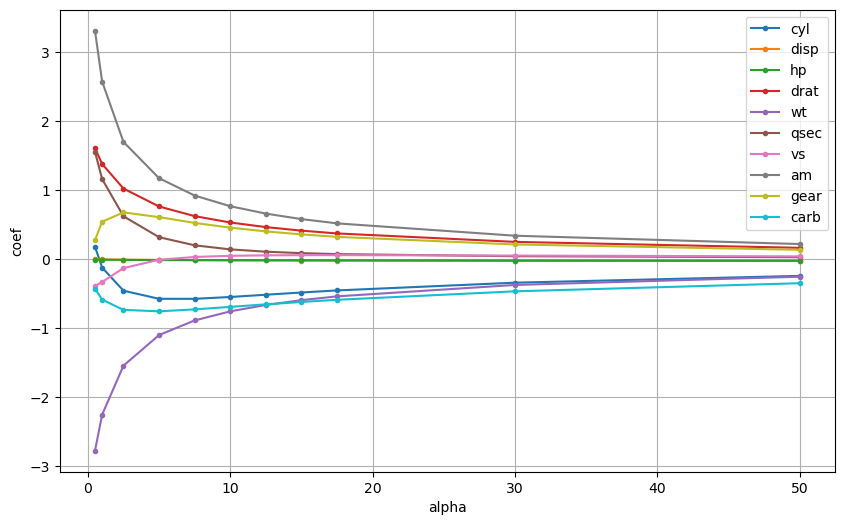

In [56]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

Ada cara lebih cepat

In [57]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [58]:
# Buat model & parameter model yang ingin divariasikan
ridge = Ridge()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 30.0, 50.0]}

In [59]:
# Lakukan grid search dengan CV
cv_ridge = GridSearchCV(estimator = ridge,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_ridge.fit(X = X_train,
             y = y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0,
                                   17.5, 30.0, 50.0]},
             scoring='neg_mean_squared_error')

In [60]:
cv_ridge.best_params_

{'alpha': 2.5}

In [61]:
# Buat objek baru
best_ridge = Ridge(alpha = cv_ridge.best_params_["alpha"])

# Fit model
best_ridge.fit(X = X_train,
               y = y_train)

Ridge(alpha=2.5)

In [62]:
best_ridge.coef_

array([-0.45372081, -0.00514687, -0.00753064,  1.02572436, -1.53952835,
        0.62447844, -0.12665636,  1.70139692,  0.68026538, -0.73159023])

---
# **Melakukan Regularisasi Lasso**

In [63]:
# Import Ridge
from sklearn.linear_model import Lasso

In [64]:
# Buat objek
lasso = Lasso(alpha = 0.1)

In [65]:
# Lakukan fitting
lasso.fit(X = X_train,
          y = y_train)

Lasso(alpha=0.1)

In [66]:
# Buat prediksi di data train
y_pred_train = lasso.predict(X_train)
train_score = mean_squared_error(y_train, y_pred_train)
train_score

4.3273704936051285

In [67]:
# Lakukan cross validation
scores = cross_val_score(estimator = lasso,
                         X = X_train,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

scores

array([ -2.48557133, -14.38439648,  -4.24155457, -25.37018085,
       -22.5366672 ])

In [68]:
cv_score = -np.mean(scores)
cv_score

13.803674084603482

In [69]:
# Test score
y_pred_test = lasso.predict(X_test)
test_score = mean_squared_error(y_test, y_pred_test)
test_score

8.267867442449342

In [70]:
# Tampilkan parameter
coef_ = lasso.coef_
intercept_ = lasso.intercept_
params = np.append(coef_, intercept_)

params_df = pd.DataFrame(params,
                         index = list(X_train.columns) + ["constant"],
                         columns = ["coefficient"])
params_df

,coefficient
cyl,-0.000000
disp,-0.000769
hp,-0.008676
drat,0.921383
wt,-2.389247
qsec,1.126072
vs,0.000000
am,3.265893
gear,0.000000
carb,-0.384994


In [71]:
# Gabungkan semuanya dalam 1 fungsi
def lasso_model(X_train, y_train,
                X_test, y_test,
                alpha):
    # Buat objek
    estimator = Lasso(alpha = alpha)

    # Lakukan fitting
    estimator.fit(X = X_train,
                  y = y_train)
    
    # Buat prediksi di data train
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_train, y_pred_train)

    # Lakukan cross validation
    scores = cross_val_score(estimator = estimator,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    cv_score = -np.mean(scores)

    # Test score
    y_pred_test = estimator.predict(X_test)
    test_score = mean_squared_error(y_test, y_pred_test)

    # Tampilkan parameter
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    params = np.append(coef_, intercept_)

    params_df = pd.DataFrame(params,
                             index = list(X_train.columns) + ["constant"],
                             columns = ["coefficient"])

    mse_score = [train_score, cv_score, test_score]

    return estimator, mse_score, params_df

In [72]:
alpha = 0.1
_, mse_score, lasso_param_1 = lasso_model(X_train = X_train,
                                          y_train = y_train,
                                          X_test = X_test,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
lasso_param_1

Train: 4.33, CV: 13.80, Test: 8.27


,coefficient
cyl,-0.000000
disp,-0.000769
hp,-0.008676
drat,0.921383
wt,-2.389247
qsec,1.126072
vs,0.000000
am,3.265893
gear,0.000000
carb,-0.384994


In [73]:
alpha = 0.01
_, mse_score, lasso_param_2 = lasso_model(X_train = X_train,
                                          y_train = y_train,
                                          X_test = X_test,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
lasso_param_2

Train: 3.91, CV: 21.95, Test: 13.84


,coefficient
cyl,0.725381
disp,0.006544
hp,-0.004540
drat,1.752196
wt,-3.565695
qsec,2.092492
vs,0.000000
am,4.880959
gear,-0.456863
carb,-0.092963


In [74]:
alphas = [0.05, 0.10, 0.15, 0.20, 0.25, 1.00, 
          1.25, 1.50, 1.75, 3.00, 5.00]

mse_list = []
model_list = []

for alpha in alphas:
    _, mse_i, model_i = lasso_model(X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test = y_test,
                                    alpha = alpha)
    
    mse_list.append(mse_i)
    model_list.append(model_i)

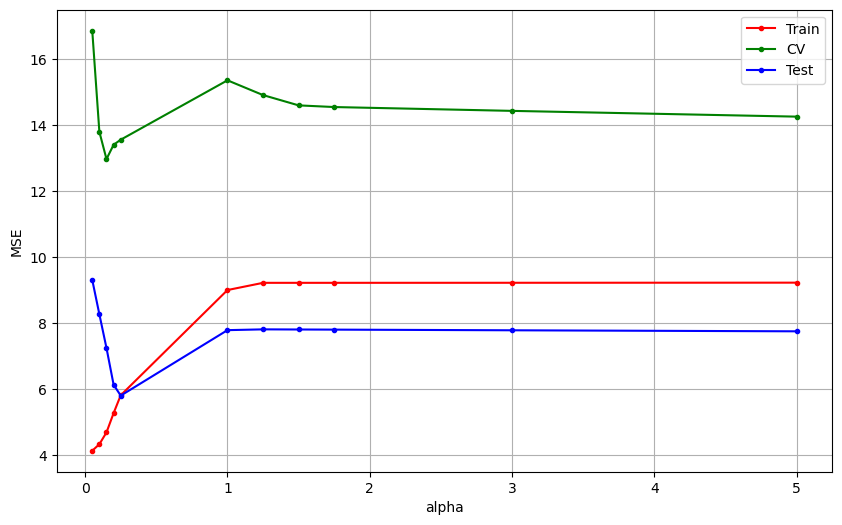

In [75]:
# Plot error
mse_list = np.array(mse_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_list[:, 0], c="r", marker=".", label="Train")
ax.plot(alphas, mse_list[:, 1], c="g", marker=".", label="CV")
ax.plot(alphas, mse_list[:, 2], c="b", marker=".", label="Test")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

# kita ingin mencari alpha yang menghasilkan CV dengan MSE kecil

In [76]:
# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_list[:, 1])
best_alpha = alphas[best_idx]
best_alpha

0.15

In [77]:
# Best model
best_param_lasso = model_list[best_idx]
best_param_lasso
# perbedaan menggunakan lasso regression adalah beberapa coefficient yang di 0 kan

,coefficient
cyl,-0.092881
disp,-0.006417
hp,-0.010095
drat,0.668991
wt,-1.819467
qsec,0.767749
vs,0.000000
am,2.808862
gear,0.000000
carb,-0.506165


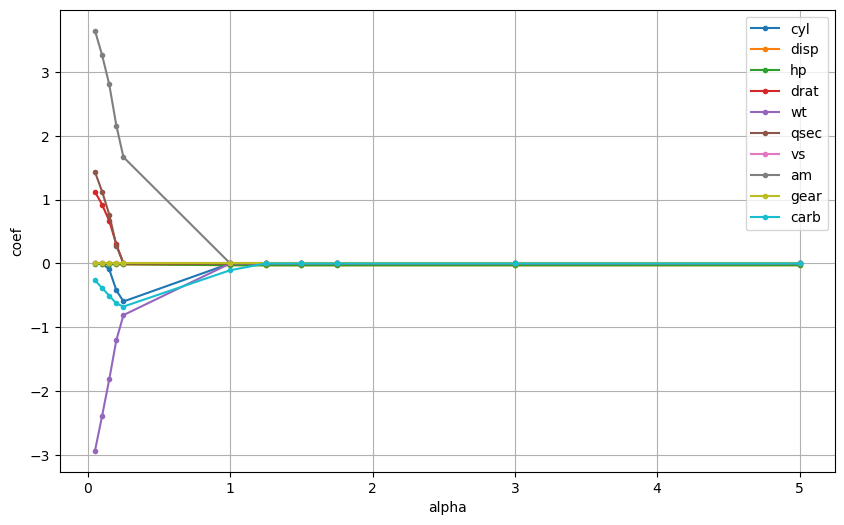

In [78]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

Ada cara lebih cepat

In [79]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [80]:
# Buat model & parameter model yang ingin divariasikan
lasso = Lasso()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5, 1.75, 3.0, 5.0]}

In [81]:
# Lakukan grid search dengan CV
cv_lasso = GridSearchCV(estimator = lasso,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_lasso.fit(X = X_train,
             y = y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5,
                                   1.75, 3.0, 5.0]},
             scoring='neg_mean_squared_error')

In [82]:
cv_lasso.best_params_

{'alpha': 0.15}

In [83]:
# Buat objek baru
best_lasso = Lasso(alpha = cv_lasso.best_params_["alpha"])

# Fit model
best_lasso.fit(X = X_train,
               y = y_train)

Lasso(alpha=0.15)

In [84]:
best_lasso.coef_

array([-0.09288145, -0.00641718, -0.01009455,  0.66899118, -1.81946701,
        0.76774888,  0.        ,  2.80886172,  0.        , -0.50616465])

---
# **Comparison**

In [85]:
best_params = pd.concat([lr_params_df,
                         best_param_ridge,
                         best_param_lasso],
                        axis = 1)
best_params.columns = ["OLS", "Ridge", "Lasso"]
best_params

,OLS,Ridge,Lasso
cyl,1.097167,-0.453721,-0.092881
disp,0.006168,-0.005147,-0.006417
hp,-0.005287,-0.007531,-0.010095
drat,1.820345,1.025724,0.668991
wt,-3.668249,-1.539528,-1.819467
qsec,2.139810,0.624478,0.767749
vs,0.851392,-0.126656,0.000000
am,5.880618,1.701397,2.808862
gear,-1.092819,0.680265,0.000000
carb,0.032545,-0.731590,-0.506165


- Terlihat Best Ridge tidak menghilangkan feature, namun best Lasso iya (fitur `vs` dan `gear` hilang)

In [86]:
# Cari score
def mse_model(estimator, X_test, y_test):
    # Predict
    y_pred = estimator.predict(X_test)

    # Cari mse
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [87]:
print(mse_model(estimator = lr, X_test = X_test, y_test = y_test))
print(mse_model(estimator = best_ridge, X_test = X_test, y_test = y_test))
print(mse_model(estimator = best_lasso, X_test = X_test, y_test = y_test))

# BEST PERFORMANCE = RIDGE REGRESSION
# karena berdasarkan test di atas ini, dia menghasilkan test dengan MSE rendah!

16.511353509876358
6.949300849934379
7.244562428822405


- Terlihat best performa di data test adalah dengan ridge.
- Menggunakan lasso juga dapat meningkatkan performa di data test, namun performa lasso masih di bawah ridge.